In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Historical Data

# https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing
import gdown
file_id = '1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs'
url = f'https://drive.google.com/uc?id={file_id}'


output = 'D:\\ds_Gopal_Kumar\\csv_files\\Historical_data.csv'

gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: D:\ds_Gopal_Kumar\csv_files\Historical_data.csv
100%|██████████| 47.5M/47.5M [00:05<00:00, 9.26MB/s]


'D:\\ds_Gopal_Kumar\\csv_files\\Historical_data.csv'

In [4]:
df = pd.read_csv('D:\\ds_Gopal_Kumar\\csv_files\\Historical_data.csv')

In [5]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
# checking the shape of dataset
df.shape

(211224, 16)

In [7]:
df['Timestamp IST'].nunique()

27977

In [8]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [9]:
# summary of dataset
df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [10]:
#Missing values
df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [11]:
df.dtypes

Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
print(df['Timestamp'].dtype)

datetime64[ns]


In [13]:
df.dtypes

Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST               object
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp           datetime64[ns]
dtype: object

In [14]:
df['Direction'].unique()

array(['Buy', 'Sell', 'Open Long', 'Close Long', 'Spot Dust Conversion',
       'Open Short', 'Close Short', 'Long > Short', 'Short > Long',
       'Auto-Deleveraging', 'Liquidated Isolated Short', 'Settlement'],
      dtype=object)

In [15]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50


In [16]:
df['Transaction Hash'].nunique()

101184

In [17]:

numeric_cols = ["Execution Price", "Size Tokens", "Size USD", "Closed PnL", "Fee"]

In [18]:
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

for col in numeric_cols:
    if col in df.columns:
        df[f"{col}_Outlier"] = detect_outliers_iqr(df[col])
    else:
        print(f"Column not found: {col}")

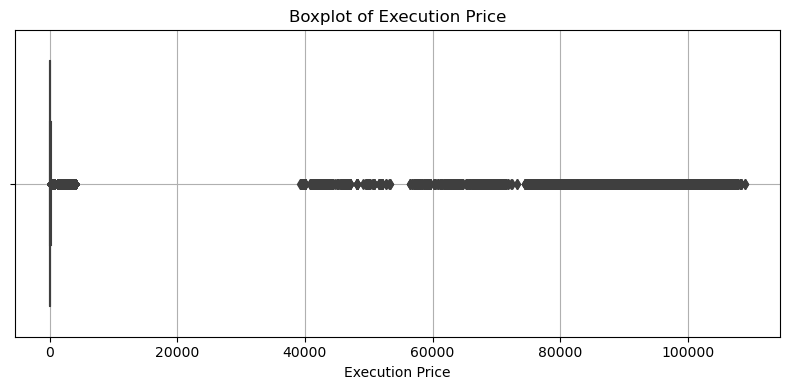

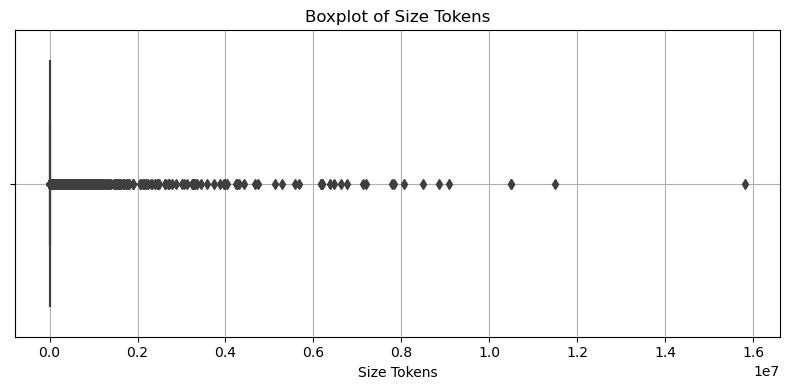

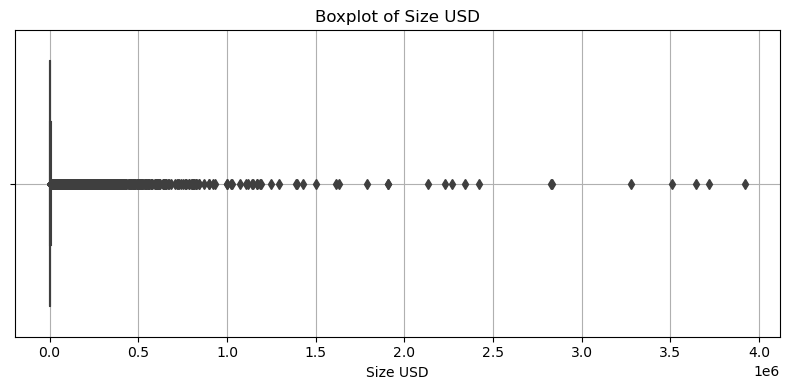

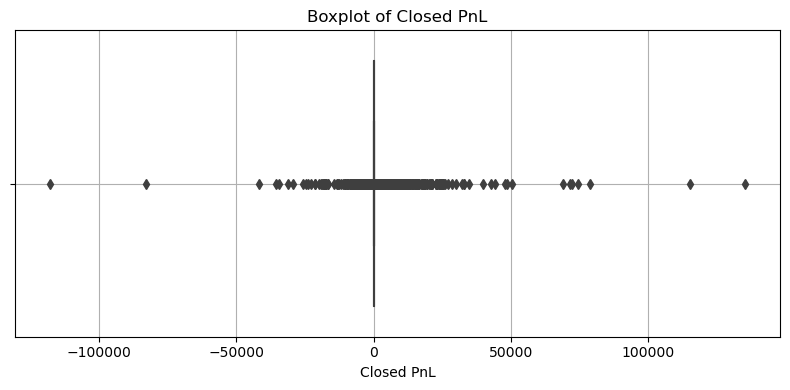

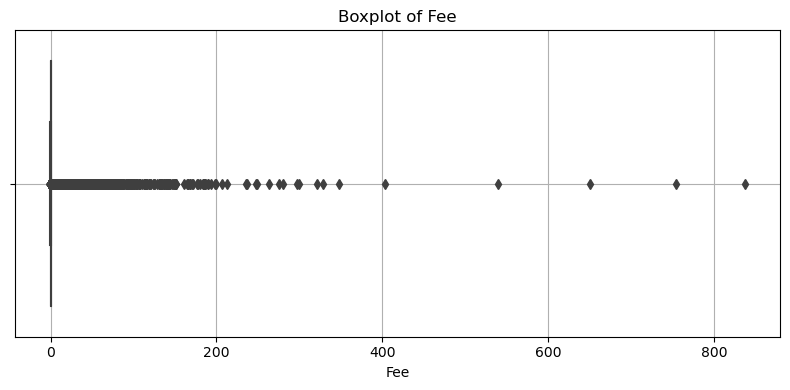

In [ ]:
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.grid(True)
        plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\boxplot.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')
        plt.tight_layout()
        plt.show()



In [20]:
direction_counts = df["Direction"].value_counts()
direction_counts

Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36013
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64

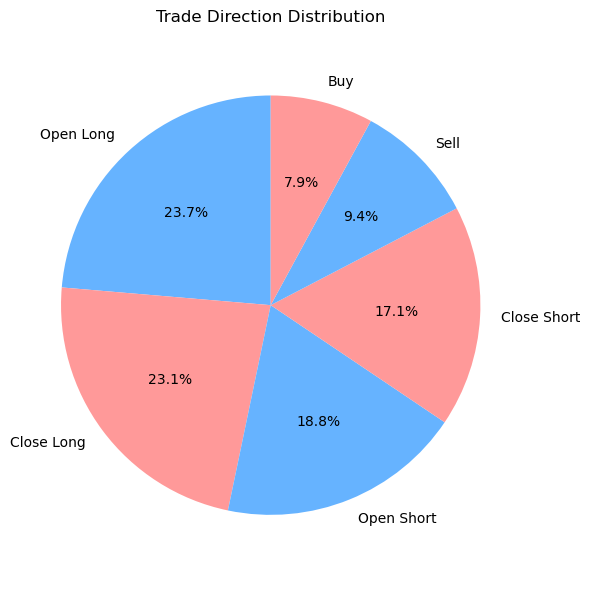

In [21]:
if "Direction" in df.columns:
    direction_counts = df["Direction"].value_counts().nlargest(6)

    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        direction_counts,
        labels=direction_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["#66b3ff", "#ff9999"]
    )

    plt.title("Trade Direction Distribution")
    plt.axis("equal")
    plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Trade Direction Distribution.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')
    plt.tight_layout()
    plt.show()

In [22]:
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], errors='coerce')

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


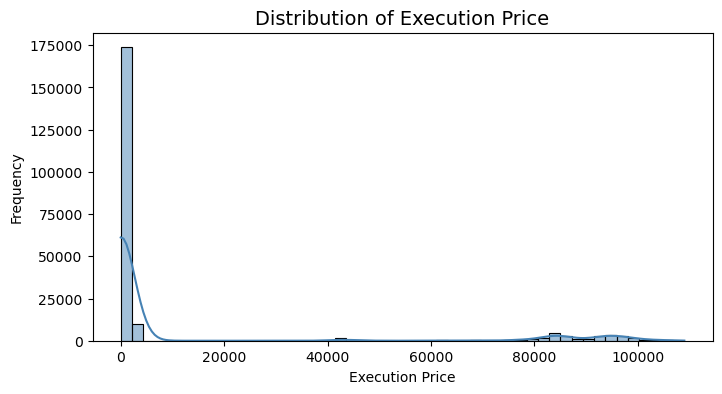

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


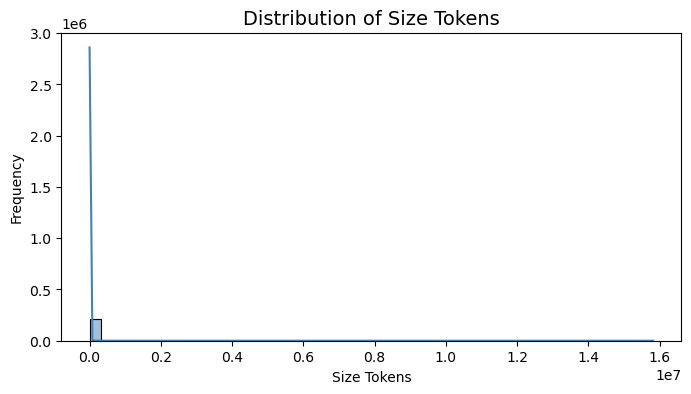

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


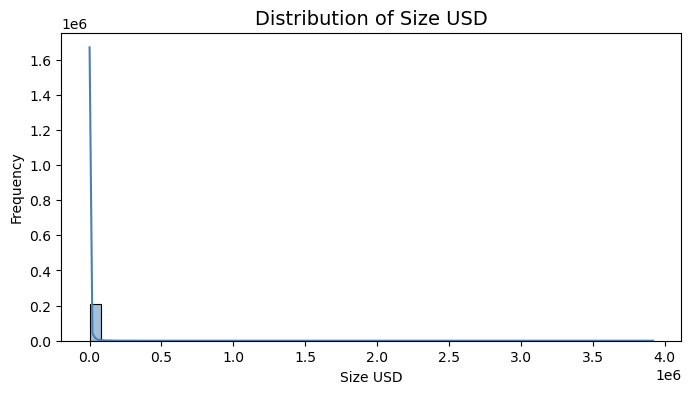

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


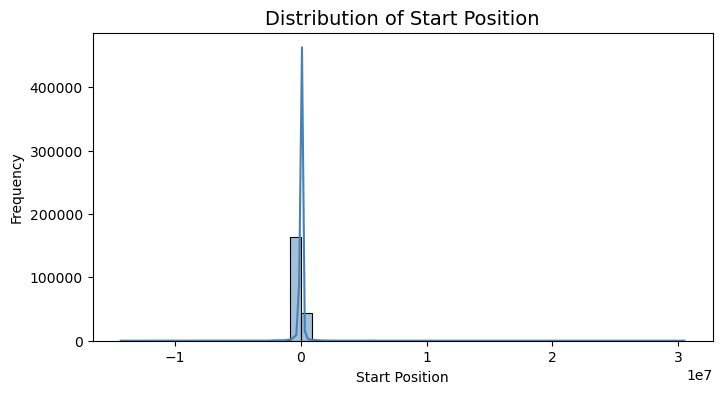

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


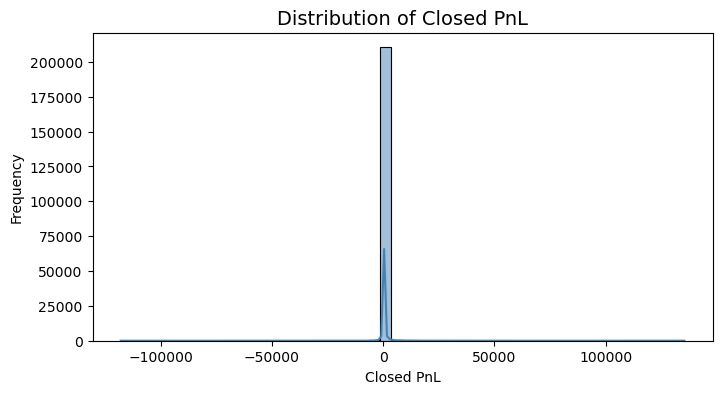

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


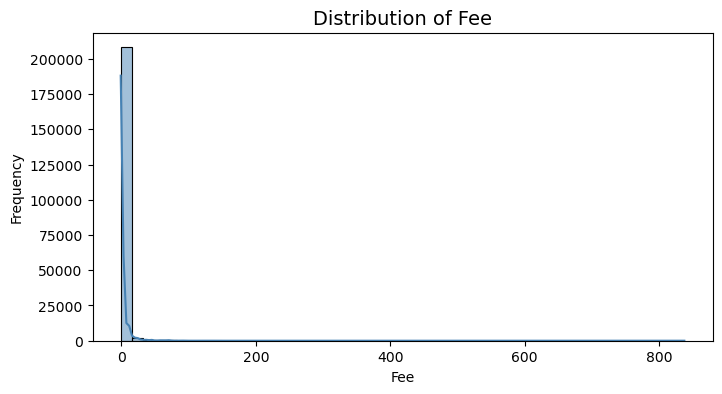

In [23]:
numeric_cols = ['Execution Price','Size Tokens','Size USD',
                'Start Position','Closed PnL','Fee']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, kde=True, color="steelblue")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Distribution.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')
    plt.show()

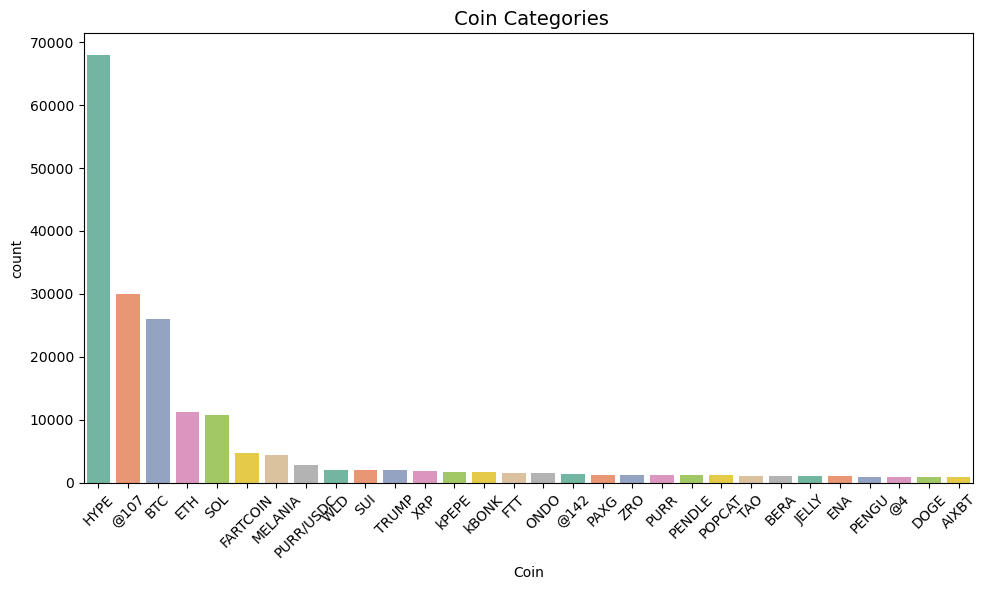

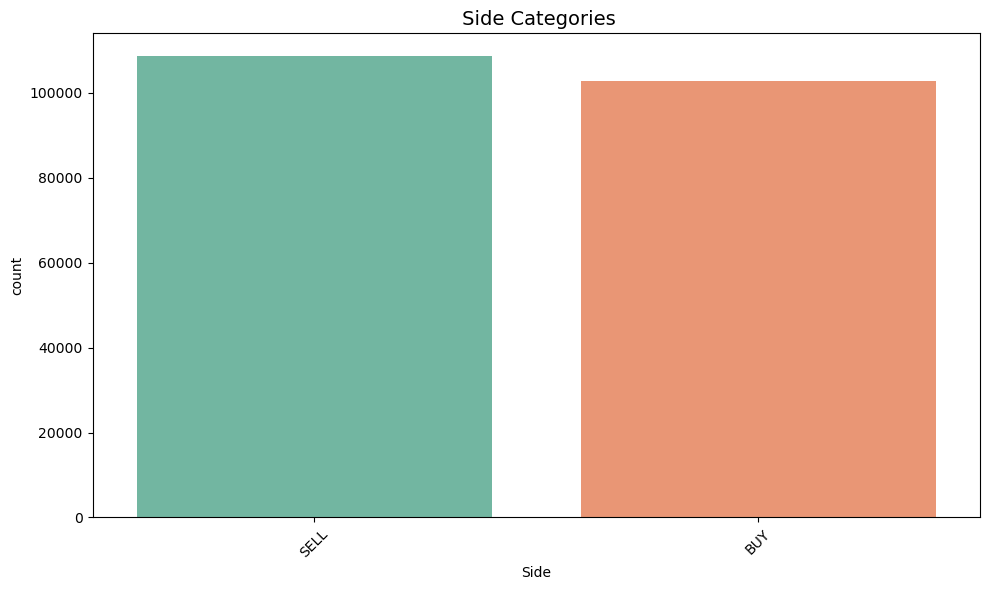

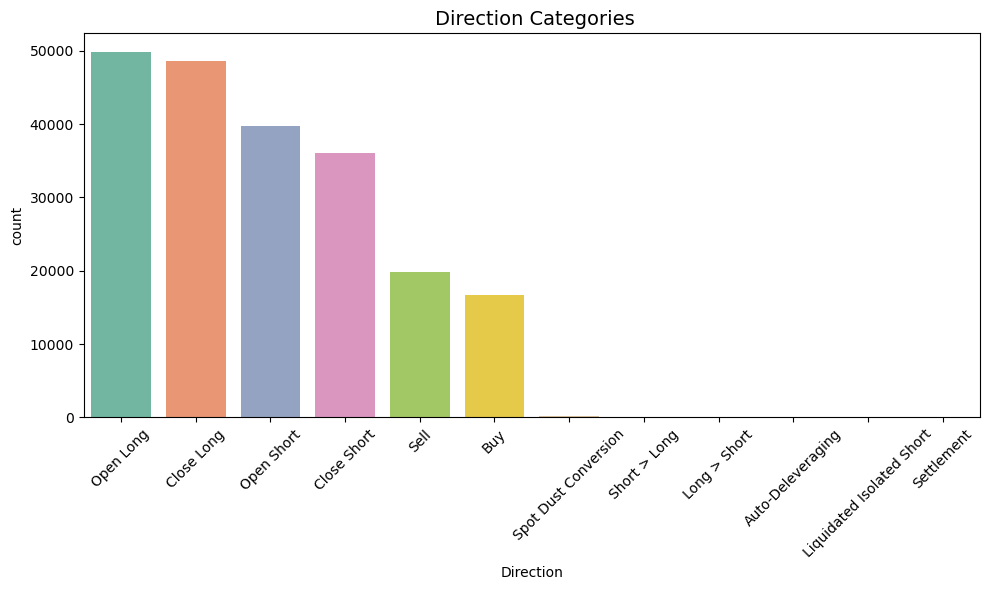

In [24]:
categorical_cols = ['Coin','Side','Direction']

for col in categorical_cols:
    top_categories = df[col].value_counts().nlargest(30).index
    filtered_df = df[df[col].isin(top_categories)]

    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=filtered_df, x=col, palette="Set2", order=top_categories)
    plt.title(f" {col} Categories", fontsize=14)
    plt.xticks(rotation=45)

    plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\countplot.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')
    plt.tight_layout()
    plt.show()

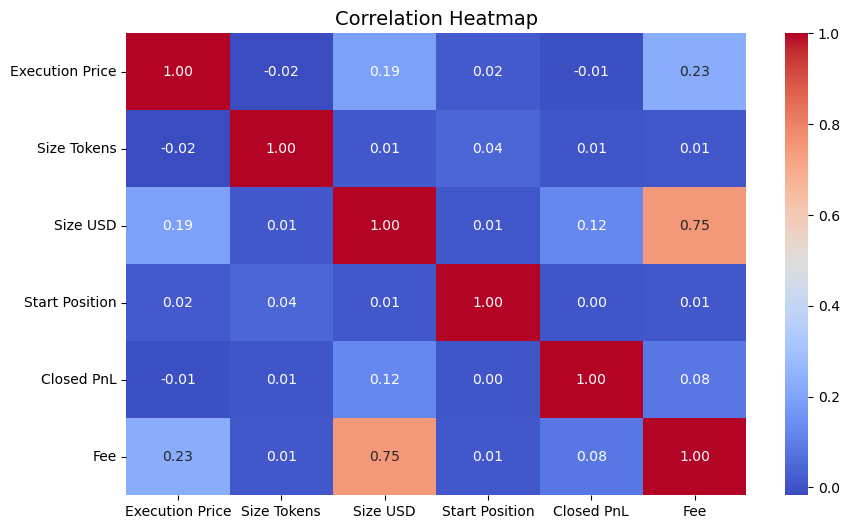

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Heatmap.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')
plt.show()

In [26]:
df['Execution Price'].nunique()

60162

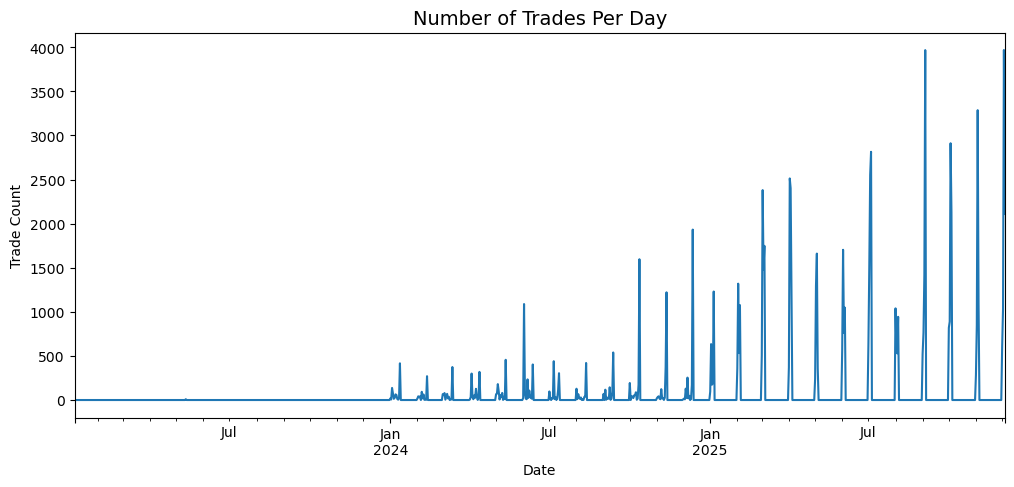

In [27]:
df.set_index('Timestamp IST').resample('D')['Execution Price'].count().plot(figsize=(12,5))
plt.title("Number of Trades Per Day", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Trade Count")
plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Number of trades per day.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')
plt.show()

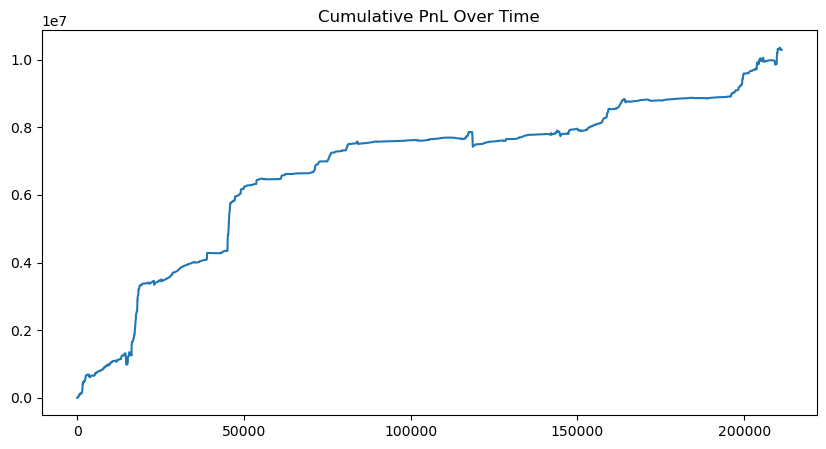

In [28]:
df["Cumulative PnL"] = df["Closed PnL"].cumsum()
df["Cumulative PnL"].plot(title="Cumulative PnL Over Time", figsize=(10,5))
plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Cumulative PnL.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')


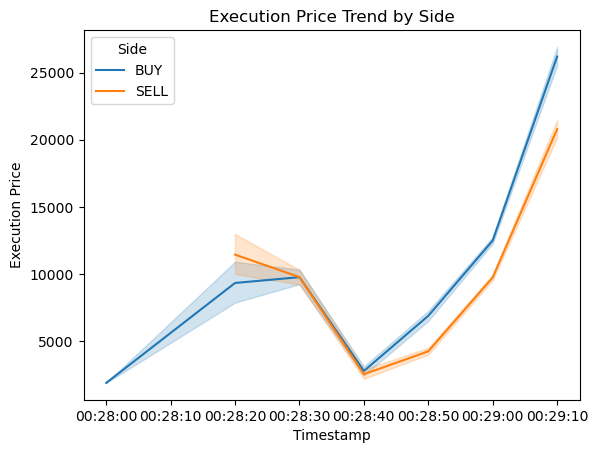

In [31]:
sns.lineplot(data=df, x="Timestamp", y="Execution Price", hue="Side")
plt.title("Execution Price Trend by Side")
plt.savefig('D:\\ds_Gopal_Kumar\\outputs\\Execution Price Trend.png', dpi=300,bbox_inches="tight",facecolor='lightgreen', edgecolor='blue')

In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import requests
import time

# Bing API Setup
BING_API_KEY = 'YOUR_BING_API_KEY'
BING_ENDPOINT = 'https://api.bing.microsoft.com/v7.0/search'

# Setup Google Sheets
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name("creds.json", scope)
client = gspread.authorize(creds)

# Open your sheet
SHEET_NAME = "Your Google Sheet Name"
sheet = client.open(SHEET_NAME).sheet1  # assumes you're using the first sheet

def bing_search(query):
    headers = {
        "Ocp-Apim-Subscription-Key": BING_API_KEY
    }
    params = {
        "q": query,
        "count": 3
    }
    response = requests.get(BING_ENDPOINT, headers=headers, params=params)
    response.raise_for_status()
    results = response.json()
    if "webPages" in results and "value" in results["webPages"]:
        return results["webPages"]["value"][0]["url"]
    return "Not Found"

def update_sheet():
    companies = sheet.col_values(1)[1:]  # Skip header
    for idx, company in enumerate(companies, start=2):  # Start at row 2
        if not company.strip():
            continue

        print(f"Processing: {company}")

        try:
            website = bing_search(f"{company} official site")
            linkedin = bing_search(f"{company} LinkedIn")

            # Write to Columns B and C
            sheet.update_cell(idx, 2, website)
            sheet.update_cell(idx, 3, linkedin)

            time.sleep(1)  # To avoid hitting API rate limits
        except Exception as e:
            print(f"Error processing {company}: {e}")
            sheet.update_cell(idx, 2, "Error")
            sheet.update_cell(idx, 3, "Error")

update_sheet()


In [ ]:
# ✅ What You’ll Build

# A Python script that will:

# Read company names from a Google Sheet (Column A)

# Search for their website and LinkedIn page using Bing Search API

# Write back the results into:

# Column B → Website

# Column C → LinkedIn

# 🛠️ What You Need (Tools Setup)
# Tool	Purpose
# gspread + oauth2client	Access and edit Google Sheets from Python
# requests	Call Bing Search API
# Bing API Key	To search web
# 📌 Step-by-Step Setup
# ✅ Step 1: Set Up Google Sheets API Access
# 1. Create a Google Cloud project

# Visit: https://console.cloud.google.com/

# Create a new project.

# 2. Enable Google Sheets API

# APIs & Services > Enable APIs > Search "Google Sheets API" > Enable it.

# 3. Create a service account

# Go to IAM & Admin > Service accounts

# Click "Create Service Account"

# Assign the role: Editor or Sheets API Editor

# 4. Create and download the JSON key

# Save this as creds.json in your Python project.

# 5. Share your Google Sheet with this email (e.g. your-service-account@your-project.iam.gserviceaccount.com) with Editor access.
# ✅ Step 2: Install Python Packages
# pip install gspread oauth2client requests

# ✅ Step 3: Python Script to Get Website + LinkedIn URLs
# import gspread
# from oauth2client.service_account import ServiceAccountCredentials
# import requests
# import time

# # Bing API Setup
# BING_API_KEY = 'YOUR_BING_API_KEY'
# BING_ENDPOINT = 'https://api.bing.microsoft.com/v7.0/search'

# # Setup Google Sheets
# scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
# creds = ServiceAccountCredentials.from_json_keyfile_name("creds.json", scope)
# client = gspread.authorize(creds)

# # Open your sheet
# SHEET_NAME = "Your Google Sheet Name"
# sheet = client.open(SHEET_NAME).sheet1  # assumes you're using the first sheet

# def bing_search(query):
#     headers = {
#         "Ocp-Apim-Subscription-Key": BING_API_KEY
#     }
#     params = {
#         "q": query,
#         "count": 3
#     }
#     response = requests.get(BING_ENDPOINT, headers=headers, params=params)
#     response.raise_for_status()
#     results = response.json()
#     if "webPages" in results and "value" in results["webPages"]:
#         return results["webPages"]["value"][0]["url"]
#     return "Not Found"

# def update_sheet():
#     companies = sheet.col_values(1)[1:]  # Skip header
#     for idx, company in enumerate(companies, start=2):  # Start at row 2
#         if not company.strip():
#             continue

#         print(f"Processing: {company}")

#         try:
#             website = bing_search(f"{company} official site")
#             linkedin = bing_search(f"{company} LinkedIn")

#             # Write to Columns B and C
#             sheet.update_cell(idx, 2, website)
#             sheet.update_cell(idx, 3, linkedin)

#             time.sleep(1)  # To avoid hitting API rate limits
#         except Exception as e:
#             print(f"Error processing {company}: {e}")
#             sheet.update_cell(idx, 2, "Error")
#             sheet.update_cell(idx, 3, "Error")

# update_sheet()

# 📝 What Your Google Sheet Should Look Like Before Running
# A (Company)
# TCS
# Infosys
# Wipro

# The script will populate:

# A (Company)	B (Website)	C (LinkedIn)
# TCS	tcs.com	linkedin.com/company/tcs
# Infosys	infosys.com	linkedin.com/company/infosys
# 🛡️ Notes & Tips

# Free Bing API limit: 1,000 requests/month (so 500 companies if doing both site + LinkedIn).

# Add retry logic or logging if scaling to larger volumes.

# You can export to CSV instead of writing back to Sheets if you prefer.

# ✅ Want a Starter Project ZIP?

# Would you like me to:

# Package this into a zip file

# Include a dummy Sheet setup

# Add sample creds.json placeholder

# Include requirements.txt

# Let me know, and I’ll generate the full template for you to download and run.

# Would you prefer that?

# Attach
# Search
# Study
# Voice
# ChatGPT can

In [ ]:
# Got it — you're using Zoho Sheet instead of Google Sheets. Thanks for that detail — it changes the setup, but it’s still very possible to automate this task using Python.

# ✅ Updated Goal with Zoho Sheet

# You want to:

# Read company names from a Zoho Sheet

# Fetch their:

# Official website

# Official LinkedIn page

# Write back the results to Zoho Sheet

# 🔄 How to Do This with Zoho Sheets + Python

# Zoho offers a full Sheet API (part of Zoho WorkDrive), which allows you to read/write Zoho Sheets programmatically.

# 🛠️ High-Level Steps
# Step	Description
# 1	Create a Zoho Developer account and register an app
# 2	Get OAuth tokens to use the Zoho Sheet API
# 3	Use Python to read/write to the Zoho Sheet
# 4	Add Bing Search to fetch website + LinkedIn
# 5	Combine both parts into a working script
# ✅ Step-by-Step Instructions
# 🔐 Step 1: Get Zoho API Access
# 1. Create Developer Account (if not done)

# Go to: https://accounts.zoho.com/signin

# 2. Register an OAuth Client

# Visit: https://api-console.zoho.in/

# Create a new client

# Client type: Server-based

# Redirect URI: http://localhost or similar

# 3. Note:

# Client ID

# Client Secret

# Generate access token using Zoho OAuth (I’ll give you a script to do that)

# 🧠 Step 2: Use Zoho Sheet API (Read/Write Sheet)

# You’ll use:

# Zoho Sheet API Docs: https://www.zoho.com/sheet/api/

# Key API endpoints:

# GET /sheet/{sheet_id}/range

# POST /sheet/{sheet_id}/range or update for writing

# 🧪 Step 3: Python Setup

# You’ll need:

# pip install requests

# 🔧 Step 4: Sample Python Script – Read/Write Zoho Sheet + Bing

# Here's a simplified working structure to get you started.

# 1. Step: Authenticate with Zoho
# import requests

# CLIENT_ID = 'your_client_id'
# CLIENT_SECRET = 'your_client_secret'
# REFRESH_TOKEN = 'your_refresh_token'

# def get_access_token():
#     url = "https://accounts.zoho.in/oauth/v2/token"
#     params = {
#         'refresh_token': REFRESH_TOKEN,
#         'client_id': CLIENT_ID,
#         'client_secret': CLIENT_SECRET,
#         'grant_type': 'refresh_token'
#     }
#     response = requests.post(url, params=params)
#     return response.json()['access_token']

# 2. Step: Read Company Names from Zoho Sheet
# def get_company_names(sheet_id, access_token):
#     url = f"https://sheet.zoho.in/api/v2/sheets/{sheet_id}/ranges/A2:A100"
#     headers = {
#         "Authorization": f"Zoho-oauthtoken {access_token}"
#     }
#     response = requests.get(url, headers=headers)
#     values = response.json()['data']['content']
#     return [row[0] for row in values if row]

# 3. Step: Use Bing API to Fetch Website + LinkedIn

# (Same as earlier)

# def bing_search(query):
#     BING_API_KEY = 'your_bing_api_key'
#     endpoint = "https://api.bing.microsoft.com/v7.0/search"
#     headers = {
#         "Ocp-Apim-Subscription-Key": BING_API_KEY
#     }
#     params = {
#         "q": query,
#         "count": 3
#     }
#     res = requests.get(endpoint, headers=headers, params=params)
#     results = res.json()
#     if "webPages" in results and "value" in results["webPages"]:
#         return results["webPages"]["value"][0]["url"]
#     return "Not Found"

# 4. Step: Write Website + LinkedIn Back to Sheet
# def update_zoho_sheet(sheet_id, access_token, row_index, website, linkedin):
#     url = f"https://sheet.zoho.in/api/v2/sheets/{sheet_id}/ranges/B{row_index}:C{row_index}"
#     headers = {
#         "Authorization": f"Zoho-oauthtoken {access_token}",
#         "Content-Type": "application/json"
#     }
#     body = {
#         "data": {
#             "content": [[website, linkedin]]
#         }
#     }
#     res = requests.post(url, headers=headers, json=body)
#     return res.status_code == 200

# ✅ Final Step: Run the Full Workflow
# def main():
#     sheet_id = 'your_zoho_sheet_id'
#     access_token = get_access_token()
#     companies = get_company_names(sheet_id, access_token)

#     for idx, company in enumerate(companies, start=2):
#         print(f"Processing: {company}")
#         website = bing_search(f"{company} official site")
#         linkedin = bing_search(f"{company} LinkedIn")
#         update_zoho_sheet(sheet_id, access_token, idx, website, linkedin)

# if __name__ == "__main__":
#     main()

# ✅ Summary
# Part	Tools
# Sheet access	Zoho Sheet API + OAuth 2
# Web search	Bing Search API
# Language	Python
# Extras	Rate limiting, retries, logging (you can add later)

In [ ]:
# import requests
# import time

# # Configuration
# ACCESS_TOKEN = 'your_access_token_here'
# SPREADSHEET_ID = 'your_sheet_id'  # Found in the Zoho Sheet URL
# WORKSHEET_NAME = 'Sheet1'
# SERPAPI_KEY = 'your_serpapi_key'

# # Headers
# headers = {
#     'Authorization': f'Zoho-oauthtoken {ACCESS_TOKEN}'
# }

# # Get sheet data
# def get_company_names():
#     url = f"https://sheet.zoho.com/api/v2/{SPREADSHEET_ID}/sheets/{WORKSHEET_NAME}/range/A2:A100"
#     response = requests.get(url, headers=headers)
#     data = response.json()
#     values = [row[0] for row in data.get("data", {}).get("rows", []) if row]
#     return values

# # Search for website using SerpAPI
# def get_website(company_name):
#     search_url = "https://serpapi.com/search"
#     params = {
#         "q": company_name,
#         "api_key": SERPAPI_KEY,
#         "engine": "google",
#         "num": 1
#     }
#     try:
#         res = requests.get(search_url, params=params)
#         results = res.json()
#         return results.get("organic_results", [{}])[0].get("link", "")
#     except Exception as e:
#         print(f"Failed to get website for {company_name}: {e}")
#         return ""

# # Write back to Zoho Sheet
# def update_website_in_sheet(row_index, website):
#     update_url = f"https://sheet.zoho.com/api/v2/{SPREADSHEET_ID}/sheets/{WORKSHEET_NAME}/range/B{row_index}"
#     data = {
#         "data": [[website]]
#     }
#     response = requests.put(update_url, headers=headers, json=data)
#     return response.status_code == 200

# # Main script
# company_names = get_company_names()
# start_row = 2

# for i, company in enumerate(company_names, start=start_row):
#     website = get_website(company)
#     print(f"{company} → {website}")
#     update_website_in_sheet(i, website)
#     time.sleep(2)  # Avoid rate limiting
